# chapter04. 분류

1. 분류의 개요
2. 결정트리
3. 앙상블 학습
4. 랜덤 포레스트
5. GBM(Gradient Boosting Machine)
6. XGBoost(eXtra Gradient Boost)

### 01. 분류의 개요
지도학습이란 명시적인 데이터가 주어진 상태에서 학습하는 머신러닝 방식을 의미한다. 즉 학습 데이터로 주어진 데이터의 피처와 레이블 값을 머시러닝 알고리즘으로 학습하여 모델을 생성하고 이렇게 학습된 모델에 새로운 데이터 값이 주어졌을 때, 미지의 레이블 값을 예측하는 것이다. <br>
정형데이터 분석에 있어 가장 많은 예측분석 영역을 차지하는 것은 `앙상블`이다. 앙상블은 서로 다른/또는 같은 알고리즘을 단순히 결합한 형태도 있으나 일반적으로는 Bagging과 Boosting방식으로 나눈다. <br>
Bagging의 대표적인 방식은 랜덤포레스트이다. 이는 뛰어난 예측성능, 상대적으로 빠른 수행시간, 유연성을 가진다. 결정트리는 매우 쉽고 유연하게 적용이 가능하다. 또 데이터 스케일링이나 정규화의 영향이 적지만, 데이터를 학습시키는데 복잡한 구조를 가지므로 과적합의 문제가 크다. 이런 약한 모델을 여러개 합하여 오류를 보완하고 확률적 보완을 통해 가중치를 높인 것을 앙상블이라고 한다. <br>
Boosting에서는 부스팅의 효시라고 할 수 있는 Gradient Boosting의 경우 뛰어난 예측성능을 가지고 있지만 시간이 너무 오래걸려 최적화 모델 튜닝이 어려웠다. 따라서 최근에는 Xgboost와 LightGBM 모델을 사용하여 기존의 예측성능에서 더 발전시키면서도 수행시간을 단축시킨 알고리즘을 정형데이터의 분류 영역에서 많이 사용합니다. 

### 02. 결정트리

결정트리는 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내는 트리 기반의 분류규칙을 만드는 것이다. 일반적으로 생각하기에 if~else문을 자동으로 찾아내어 예측을 위한 규칙을 만드는 과정이라고 생각하면 편하다. <br>
루트노드에서 규칙에 따라 분할되어 규칙노드를 만들어가는 형식이므로 depth가 깊어지면 규칙이 많아지고 과적합될 가능성이 높아진다고 본다. 

따라서 가능한 적은 결정노드로 예측정확도를 가지려면 데이터를 분류할 때, 최대한 많은 데이터 셋이 해당 분류에 속하도록 결정노드의 규칙이 정해져야 한다.(데이터가 무질서하면 무질서할수록 더 많은 규칙이 필요하기 때문이다=변수의 개념과 비슷하다고 생각, 즉 이 무질서도를 나타내는 것이 **엔트로피**의 개념이다. 

데이터가 균일하지 않다면, 상대적으로 혼잡도가 높고 균일도가 낮기 때문에 같은 조건에서 데이터를 판단하는데 있어 더 많은 정보가 필요하기 때문이다.  따라서 결정트리는 정보균일도가 높은 데이터셋을 먼저선택할 수 있도록 규칙 조건을 만든다. 즉 정보균일도가 데이터 셋으로 쪼개질 수 있도록 조건을 찾아 서브데이터셋을 만들고 다시 이 서브 데이터셋에서 균일도가 높은 자식 데이터셋을 쪼개는 방식을 자식트리로 내려가면서 반복한다. 

이런 정보균일도를 측정하는 대표적인 방법은 **엔트로피**를 이용한 **정보이득지수**와 **지니계수**를 구하는 과정을 볼 수가 있다. <br>
`정보이득`은 데이터셋을 통해 얼만큼의 정보를 얻을 수 있는가를 기반으로 한다. 따라서 균일한 정보가 많으면 정보이득이 높다고 본다( 정보이득=1-엔트로피) <br>
`지니계수`는 경제학적 용어로 평등을 나타내는 값으로 여기서는 데이터가 다양할 수록 평등하며 특정한 값으로 쏠릴 경우에 불평등한 값이 된다고 본다. 즉 다양성이 낮을수록 균일도가 높다고 본다

결정트리알고리즘은 기본으로 지니계수를 사용하며, 지니계수가 높은 조건을 찾아서(=혼잡도가 낮은=데이터가 균등하게 분포되어 있는) 자식트리 노드에 걸쳐 반복적으로 분할한 후, 데이터가 모두 특정한 분류에 속하게 되면 분할을 멈추고 분류를 결정한다.<br>
sklearn의 결정트리알고리즘은 CART를 기반으로 사용한다. 

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [43]:
#DecisionTreeClassifier 객체의 생성
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고 학습데이터와 테스트데이터로 분리한다, 
iris_data=load_iris()
X_train, X_test, y_train, y_test=train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

In [44]:
#DecisionTree학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

In [45]:
#sklearn 트리 모듈을 시각화하기 위한 Graphviz를 이용하기 위해 제공되는 함수 
from sklearn.tree import export_graphviz

In [46]:
#export_graphviz()의 호출의 결과로 outfile지정된 tree.dot파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot',class_names=iris_data.target_names,\
               feature_names=iris_data.feature_names, impurity=True, filled=True)

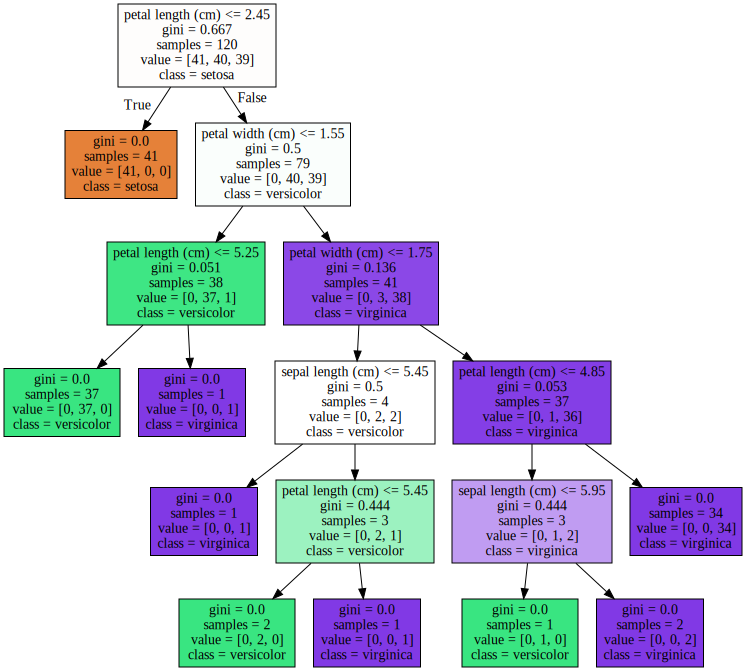

In [47]:
#이렇게 outfile이름으로 생성된 tree.dot의 모델을 Graphiz 모듈을 사용하여 시각화 가능하다
#단 설치시에 Graphviz 파일을 다운받아야 한다. 
import graphviz
#위에서 생성한 tree.dot파일을 Graphiz가 잃어서 jupyter상으로 나타내는 방법
with open('tree.dot') as f:
    dot_graph=f.read()
graphviz.Source(dot_graph)

-리프노드 : 더이상 자식노드가 없는 단말노드를 의미, 최종 레이블값이 결정이 된다 <br>
 리프노드가 되려면 오직 하나의 클래스 값으로 최종데이터가 구성이 되거나 리프노드가 될 수 있는 hyperparameter의 조건을 갖춰야 한다.<br>
-브랜치 노드 : 자식노드를 만들기 위한 분햘규칙을 가지고 있는 것이다. 


- petal length < 2.45와 같이 feature의 조건이 있는 것은 자식노드를 만들기 위한 규칙조건이다. 
- gini는 value=[]로 주어진 데이터 분포에서의 지니계수이다. 
- samples는 현 규칙에 해당하는 데이터의 건수이다. 
- value=[]는 클래스 기반의 데이터 건수이다. 붓꽃 데이터 셋은 클래스값으로 0,1,2를 가지고 있으므로 [41,40,39]와 같이 있는 경우 각 0,1,2에 해당하는 데이터의 갯수라고 보면 된다. 

- 각 노드의 색은 붓꽃 데이터의 레이블 값을 의미한다. 각 [0,1,2]의 값을 차례대로 [orange, green, purple]을 의미한다. 색이 짙어질수록 지니계수가 낮고(=불평등해진다=다양성이 낮아진다)해당 레이블에 속하는 샘플 데이터수가 많아진다는 말이다. 

트리는 과적합이 되기 아주 적합한 모델이다 따라서 hyperparameter의 적용이 매우 중요하게 작용될 수 있다. <br>
ex)  min_sample_splits=4로 한다면 3가지에 대한 분류가 완벽하게 되지 않았는데도 적당한 깊이에서 depth 생성을 멈춤을 볼 수가 있다. <br>
ex2)  min_samples_leaf=4로 지정하는 경우에 샘플이 4이하이면 리프노드가 되기 때문에 지니계수가 크더라도 샘플이 4인 규칙 변경을 선호하게 되어 자연스럽게 노드가 줄어들고 결정트리가 간결해진다.  

결정트리는 **균일도**에 기반해 어떠한 속성을 규칙 조건으로 생성하느냐가 중요한 요건이 될 수가 있다. 즉 중요한 몇 개의 feature가 명확한 규칙트리를 만드는데 크게 기여하며 모델을 좀더 간결하고 이상치에 강한 모델을 생성하기 때문이다. <br>
따라서 sklearn은 트리를 생성하는데 중요하게 작용하는 feaure들을 중요도별로 나눠서 출력할 수 있는 매서드를 제공한다. 

In [48]:
import seaborn as sns
import numpy as np
%matplotlib inline

In [49]:
#feature importance 추출
print('Feature importance: \n{0}'.format(np.round(dt_clf.feature_importances_,3)))

Feature importance: 
[0.025 0.    0.555 0.42 ]


In [50]:
#feature와 importance를 매핑한다 = feature과 중요도추출 결과를 함께 출력하기 위한다
for name,value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name,value))

sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


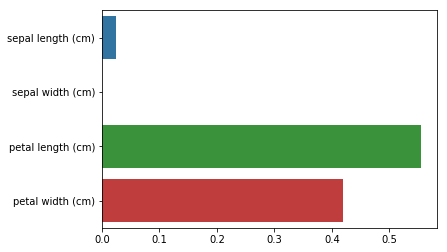

In [51]:
#위에서 나타낸 변수중요도의 시각화 
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### 결정트리의 과적합
DecisionTree가 어떻게 학습 데이터를 분할하여 예측을 수행하는지와 이로 인한 과적합문제를 시각화하여 알아보고자 한다. 또한 2개의 feature값과 3개의 class를 가지는 sklearn 내부의 make_classification()함수를 사용한다. 

In [52]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

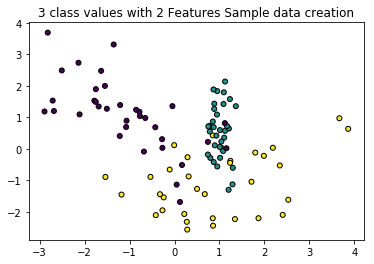

In [53]:
plt.title('3 class values with 2 Features Sample data creation')

#2차원 데이터의 시각화를 위해 feauture는 2개, class(y_;abel을 의미한다 )는 3개의 분류 샘플 데이의 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, 
                                          random_state=0)
#그래프 형태의 2차원 시각화를 위하여 scatter함수를 사용하여 시각화 
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k')

In [54]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)
import warnings
warnings.filterwarnings('ignore')

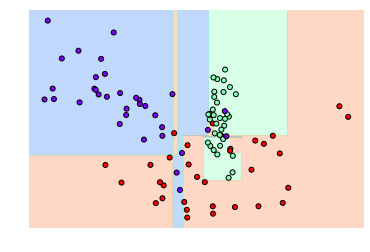

In [55]:
#visulaize_boundary()는 scatter된 값들의 분포중에 classification을 그래프 내에서 시각적으로 보여주고자 하는 것이다
#2차원 데이터 이기에 보여주기가 훨씬 더 쉬움(2차원이 아니라면 앞에서의 graphviz의 시각화가 효율적이다)
from sklearn.tree import DecisionTreeClassifier


# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화.
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

여기서 classification이 되었으나, 해당영역을 침범한 경우는 이상치로 간주한다. 하지만 이렇게 복잡한 데이터 모델의 경우는 이상치 데이터까지도 학습시켜 작동하게 하기 위해 학습데이터 셋의 특징와 약간만 다른 형태가 되면 예측성능이 매우 낮아지므로 과적합문제에 적합된다고 본다. <br>
이번에는 min_samples_leaf=6을 설정하면 6개 이하의 데이터는 leaf_node를 생성할 수 있도록 규칙을 완화한 후에 같은 규칙을 정해본다. 

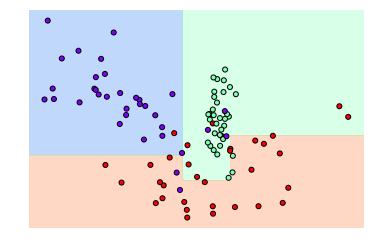

In [56]:
#min_samples_leaf=6( 과적합방지를 위해 hyper parameter을 조정하는 경우)
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels) #학습
visualize_boundary(dt_clf, X_features, y_labels)

위의 데이터를 봤을 때, 이상치에 크게 반응하지는 않으면서 전체적으로는 일반적으로 잘 분류가 되었다. 너무 학습 데이터에만 정확하게 fit되는 경우에는 학습데이터 이외의 데이터에서는 예측성능이 크게 떨어지므로 일반적인 경우에 모델이 적용이 될 수 있도록 주의해야 한다. 

### 결정트리의 실습-사용자 행동인식 데이터 세트

데이터 description: <br>
30명의 동작과 관련한 여러 feature을 수집한다. 수집된 feature 세트를 기반으로 결정트리를 이용해 어떤 동작인지 예측한다/ 

In [57]:
#데이터에서 feature의 명칭 확인
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#features.txt 파일에는 피처이름 index와 피처명이 공백으로 분리. 이를 dataframe으로 로드
feature_name_df=pd.read_csv('features.txt',sep='\s+', header=None, names=['column_index','column_name'])

#feature명을 제거하고 피처명만 리스트 객체로 생성해서 확인하기
feature_name=feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:',feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [67]:
#txt를 dataframe으로 만들어 분석해야 하므로, 분리하여 작성하는 함수를 만든다
import pandas as pd

def get_human_dataset():
    feature_name_df=pd.read_csv('features.txt',sep='\s+',header=None,names=['column_index','column_name'])
    feature_name=feature_name_df.iloc[:,1].values.tolist()
    
    X_train=pd.read_csv('X_train.txt', sep='\s+', names=feature_name)
    X_test=pd.read_csv('X_test.txt', sep='\s+', names=feature_name)
    
    y_train=pd.read_csv('y_train.txt', sep='\s+', header=None, names=['action'])
    y_test=pd.read_csv('y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [68]:
print('학습 피처 데이터셋 info()')
print(X_train.info()) #7352개의 레코드와 561개의 feature을 가지고 있다

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [69]:
print(y_train['action'].value_counts()) #예측값은 대체적으로 고르게 분포되어 있다. 

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


DecisionTreeClassifier을 통해 동작예측분류를 시행해 본다. 또 각각의 hyperparameter을 조정해 보겠다. <br>
1. 디폴트값으로 그냥 돌려보기
2. depth 조정
3. min_sample_split
4. feature_importance

1. 디폴트 값으로 그냥 돌려보기

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy)) #약 85%의 정확도

결정 트리 예측 정확도: 0.8548


In [71]:
#기본 하이퍼 파라미터 확인
print('DecisionTreeClassifier 기본 하이퍼 파라이터: \n', dt_clf.get_params())

DecisionTreeClassifier 기본 하이퍼 파라이터: 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


2. 결정트리의 depth가 정확도에 영향을 주는지를 확인 <br>
GridSearchCV()를 통해 점진적인 hyperparameter의 수정을 거친다, 교차검증도 수행해주는 함수이다. 

In [75]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1,n_jobs=1)
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  2.6min finished


GridSearchCV 최고 평균 정확도 수치:0.8526
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


3. min_samples_split가 정확도에 영향을 주는지 튜닝

In [78]:
params={
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 파라미터 수치: {0: .4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  3.2min finished


GridSearchCV 최고 평균 파라미터 수치:  0.8550
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


train data에 최적의 파라미터 depth=8, min_sample_splits=4로 했을 때 train set에서는 85%정도의 최대의 정확도를 가진다. <br>
이 파라이터를 test data에 적용해 본다. (결국 이 test data에서의 정확도를 올리는 것이 가장 중요한 것. 과대적합 문제 해결위하므로)

In [79]:
best_df_clf=grid_cv.best_estimator_ #위에서 봤던 최적의 파라미터를 가지는 변수 지정
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred1)
print('결정트리 예측의 정확도: {0:.4f}'.format(accuracy)) #87%로 정확도 올랐다. 

결정트리 예측의 정확도: 0.8717


3. feature importance가 높은 변수만을 사용하는 경우

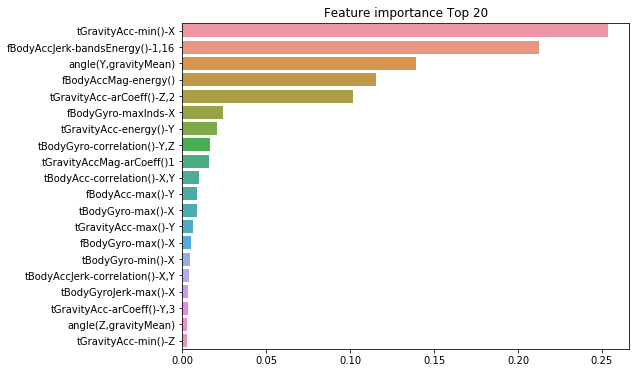

In [82]:
import seaborn as sns

ftr_importance_values=best_df_clf.feature_importances_
#top중요도로 정렬을 쉽게 하고 seaborn으로 막대그래프로 표현하기 위해 Series형태로 표현
ftr_importances=pd.Series(ftr_importance_values, index=X_train.columns)
#중요도값 순으로 Series 정렬
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importance Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

실제로 DecisionTree를 확인하면 feature_importance에서 top5의 변수들이 중요한 영향을 미치고 있음을 알 수가 있다.

### 03. 앙상블 학습

앙상블 학습은 여러개의 분류기를 생성하여 그 예측을 결합함으로써 정확한 최종 예측을 도출하는 기법을 말한다. <br>
ex) 랜덤포레스트, 그래디언트 부스팅

<앙상블 학습의 유형> <br>
1. 보팅(Voting) : 여러개의 다른 알고리즘을 동일한 데이터에 적용하여 최종예측
2. Bagging : Bootstrap Aggregation을 의미. 단일알고리즘을 여러개로 샘플링된 데이터에 적용하여 최종예측
3. Boosting : 가중치를 사용하여 약분류기를 강분류기로 만드는 과정을 의미한다. 분류기가 순차적으로 학습을 수행하며 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에서는 가중치를 부여한다. 
4. Stacking : 개별모델이 예측한 데이터를 다시 trainset이용

부스팅은 배깅보다 오류가 적지만 느리고, 오버피팅될 가능성이 높다. 무엇을 선택할 지는 상황에 따라 달라진다. 개별 결정 트리의 낮은 성능이 문제라면 부스팅이 적합하고, 오버 피팅이 문제라면 배깅이 적합하다. 

#### voting의 유형 - hardvoting과 softvoting

**hardvoting** : 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종 보팅의 결괏값으로 선정하는 것 <br>
**softvoting** : 분류기들의 레이블 값 결정확률을 모두 더하고 이를 평균하여 확률이 가장 높은 레이블 값을 최종 보팅 결괏값 채택<br>
하드보팅보다는 소프트보팅의 예측성능이 좋아 더 많이 사용된다. 

In [83]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [84]:
cancer=load_breast_cancer() #데이터셋 로드
data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들어 본다. 앙상블 방법을 사용하여 분류하는데 사용되는 모델은 다양할 수 있다. 로지스틱, SVM..등 매우 다양하다.( 그중 트리를 앙상블하여 사용되는 것이 가장 유명한 방법일 뿐이다. ) 이에 대하여 앙상블을 사용하되, 최종결정을 어떻게 내리느냐에 따라 보팅, 부스팅, 배깅,스태킹 방식으로 나눠진다는 의미이다. 

In [88]:
#로지스틱회귀와 KNN을 기반으로 하여 소프트 보팅방식으로 새롭게 보팅 분류기를 만들어 본다. 
#개별 모델은 KNN과 로지스틱이다.
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred))) #소프트부팅의 결과 

Voting 분류기 정확도: 0.9561


In [89]:
#개별모델의 학습/예측/평가
classifiers=[lr_clf, knn_clf] #개별모델의 이름 저장 리스트

for classifier in classifiers : 
    classifier.fit(X_train, y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__
    print('{0} 정확도: {1: .4f}'.format(class_name, accuracy_score(y_test, pred))) #개별 결과 

LogisticRegression 정확도:  0.9474
KNeighborsClassifier 정확도:  0.9386


ml 모델의 성능은 다양한 테스트 데이터에 의해 검증이 되므로, 어떻게 높은 유연성을 가지고 현실에 대처할 수 있는가가 ml의 평가에 있어 중요한 요소가 될 수가 있다. 배깅과 부스팅은 대부분 결정트리의 알고리즘을 기반으로 한다. 결정트리 알고리즘의 과대적합문제에 맞대응하여 결정트리의 장점을 그대로 취하고 단점은 보완하면서 편향-분산 트레이드오프 효과를 극대화 할 수 있다는 의미이다 

### 4. 랜덤포레스트

Bagging : 같은 알고리즘으로 여러개의 분류기를 만들어 voting으로 최종 결정하는 알고리즘 <br>
랜덤포레스트는 여러개의 결정트리 분류기가 전체 데이터에서 bagging방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 후에 최종적으로 모든 분류기가 voting을 통해 예측결정하게 한다. <br>
bagging은 여러개의 데이터셋을 중첩되게 분리하는 부트스래핑을 기반으로 분할하는 방식을 의미한다. <br>
원본데이터의 건수가 10개인 학습 데이터셋에 랜덤 포레스트를 3개의 결정트리 기반으로 학습하려고 n_estimators=3으로 하이퍼 파라미터를 부여한다. 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [102]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

#결정된 dataset을 반환한다. 
X_train, X_test, y_train, y_test = get_human_dataset()

In [103]:
# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rt_clf = RandomForestClassifier(random_state=0)
rt_clf.fit(X_train , y_train)
pred = rt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy)) #약 91%의 정확도

결정 트리 예측 정확도: 0.9108


<랜덤포레스트 하이퍼파라미터 튜닝> <br>
1. n_estimators : 랜덤포레스트의 결정트리 개수를 지정, 높다고 무조건 좋은 건 아님
2. max_featuers : 결정트리에서 사용된 max_feaures파라미터와 동일하다. 디폴트값은 sqrt이다. 
3. max_depth, min_samples와 같은 하이퍼파라미터는 트리와 동일하게 적용된다. 
4. feaure importance

In [108]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9166


In [110]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


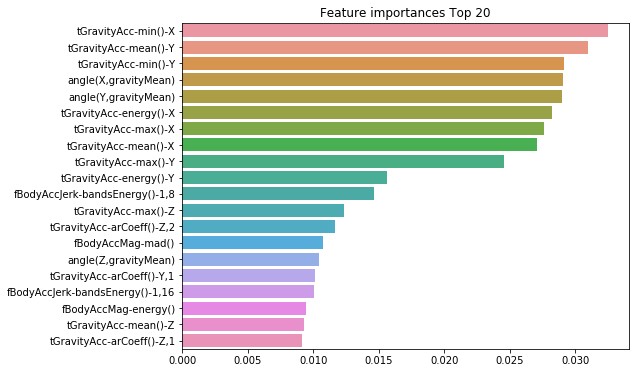

In [111]:
#변수 중요도 확인
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

### 05. GBM(Gradient Boosting Machine)

부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여하여 오류를 개선하면서 학습하는 방식이다. 부스팅의 대표적인 구현은 AdaBoost, GradientBoost가 있다. 

1. Adaboost : 오류데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘이다. 

2. GBM(gradient Boosting Machine) : 가중치 업데이트 방식을 사용하는 알고리즘

In [115]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test

#결정된 dataset을 반환한다. 
X_train, X_test, y_train, y_test = get_human_dataset()

In [116]:
#GBM수행시간 측정을 위함
start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0) #GBM 객체 생성
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

In [117]:
print('GBM정확도:',gb_accuracy)
print('수행시간:', time.time()-start_time)

GBM정확도: 0.9375636240244316
수행시간: 428.4523265361786


Boosing방식 중 GBM은 기본 하이퍼파라미터 만으로도 앞의 랜덤포레스트보다 높은 성능을 나타냈다. 그러나 수행시간이 오래걸리고 파라미터 튜닝도 더 필요하다.

#### GBM 파라미터 튜닝

<GBM의 하이퍼파라미터 값> <br>
1. loss : 경사하강법에서 비용함수지정값. 디폴트는 'deviance'(편차)
2. learning rate : 학습률
3. n_estimators : 약분류기의 수이다. 디폴트는 100
4. subsamples : 약분류기가 학습되는데 사용되는 데이터 샘플리의 비율이다. 과적합이 의심되면 적은 비율로 지정한다. 

기본적으로 GBM하이퍼파라미터 튜닝시에는 30~1시간 정도 걸리므로 아래는 실행하지 않았다.. 

```python
from sklearn.model_selection import GridSearchCV
params={
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}
grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적의 하이퍼 파라미터:',grid_cv.best_params_)
print('최고 예측 정확도:', grid_cv.best_score_)```

```python
#GridSearchCV를 이용하여 최적으로 학습된 estimator로 예측을 수행한다
gb_pred=grid_cv.best_estimator_.predict(X_test)
gb_accuracy=accuracy_score(y_rest, gb_pred)
print('GBM정확도', gb_accuracy)
```

위의 GBM을 하이퍼파라미터 튜닝한 결과를 살펴보면 94%정도이다. 즉 GBM은 과적합에도 뛰어난 예측 성능을 가진다고 본다. 하지만 단점은 많은 시간이 걸린다는 점이다. 이런 점을 감안하여 **GBM기반으로 새로운 ML을 도출하는 데, 그것이 XGBOOST와 LightGBM이다.**